In [41]:
import requests
from getpass import getpass
import datetime
import pickle
import IPython

In [4]:
!pip install mlflow --quiet

import mlflow
import os
from getpass import getpass

     |████████████████████████████████| 14.6 MB 119 kB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 145 kB 66.7 MB/s 
     |████████████████████████████████| 636 kB 37.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 170 kB 50.6 MB/s 
     |████████████████████████████████| 1.1 MB 48.7 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [ ]:
os.environ['MLFLOW_TRACKING_USERNAME'] = USER_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('xxxx')

mlflow.set_tracking_uri(f'https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow')

In [2]:
# imports 
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
import math

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from scipy.special import boxcox, inv_boxcox

import scipy.stats as stats


pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
yield_crops = pd.read_csv('/content/merged_weather_yield_(3).csv')

In [11]:
# Cleaning data and dropping columns , removing grass lands , selecting crops2

yield_crops = yield_crops[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'FarmTypes', 'PotatoesTotal_9', 'WarePotatoes_10', 'SeedPotatoes_11', 'StarchPotatoes_12', 'VegetablesArable_13', 'Cereals_14', 'GrassSeed_15', 'IndustrialCrops_16', 'Pulses_17', 'SugarBeets_18', 'OtherArableCrops_19', 'FallowLand_20', 'ArableLandTotal_21', 'PotatoesTotal_22', 'WarePotatoes_23', 'SeedPotatoes_24', 'StarchPotatoes_25', 'VegetablesArable_26', 'Cereals_27', 'GrassSeed_28', 'IndustrialCrops_29', 'Pulses_30', 'SugarBeets_31', 'OtherArableCrops_32', 'FallowLand_33', 'HorticultureInTheOpenTotal_34', 'FlowerBulbs_35', 'FloriculturalCrops_36', 'NurseriesAndPerennialPlants_37', 'FruitInTheOpen_38', 'VegetablesHorticultural_39', 'HorticultureInTheOpenTotal_40', 'FlowerBulbs_41', 'FloriculturalCrops_42', 'NurseriesAndPerennialPlants_43', 'FruitInTheOpen_44', 'VegetablesHorticultural_45', 'HorticultureUnderGlassTotal_46', 'FloriculturalCrops_47', 'NurseriesAndPerennialPlants_48', 'FruitUnderGlass_49', 'VegetablesUnderGlass_50', 'HorticultureUnderGlassTotal_51', 'FloriculturalCrops_52', 'NurseriesAndPerennialPlants_53', 'FruitUnderGlass_54', 'VegetablesUnderGlass_55', 'Hyacinths_56', 'Daffodils_57', 'Tulips_58', 'OtherBulbForcing_59', 'Mushrooms_60', 'SubstrateUseMushrooms_61', 'BelgianEndiveCultivation_62', 'BulbForcingTotal_63', 'Hyacinths_64', 'Daffodils_65', 'Tulips_66', 'OtherBulbForcing_67', 'MushroomsTotal_68', 'Mushrooms_69', 'SubstrateUseMushrooms_70', 'BelgianEndiveCultivation_71', 'GrasslandAndForagePlantsTotal_72', 'GrasslandTotal_73', 'PastureAndMeadows_74', 'RoughGrazing_75', 'TemporaryGrass_76', 'ForagePlants_77', 'GrasslandAndForagePlantsTotal_78', 'GrasslandTotal_79', 'PastureAndMeadows_80', 'RoughGrazing_81', 'TemporaryGrass_82', 'ForagePlants_83']]



In [12]:
yield_crops.FarmTypes.unique()

array(['A009481', 'A009497'], dtype=object)

In [13]:
# Dividing by farm types
Farm_type_1 = yield_crops[yield_crops['FarmTypes']=='A009481'] #specialit field crop
Farm_type_2 = yield_crops[yield_crops['FarmTypes']=='A009497'] # specialist permanent crop

# FARM TYPE 1

In [14]:
#FILL NAN WITH MEAN
Farm_type_1.fillna(Farm_type_1.mean(), inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
Farm_type_1.describe()

,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,TN,TNH,TX,TXH,T10N,T10NH,SQ,SP,Q,DR,RH,RHX,RHXH,PG,PX,PXH,PN,PNH,VVN,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24,PotatoesTotal_9,WarePotatoes_10,SeedPotatoes_11,StarchPotatoes_12,VegetablesArable_13,Cereals_14,GrassSeed_15,IndustrialCrops_16,Pulses_17,SugarBeets_18,OtherArableCrops_19,FallowLand_20,ArableLandTotal_21,PotatoesTotal_22,WarePotatoes_23,SeedPotatoes_24,StarchPotatoes_25,VegetablesArable_26,Cereals_27,GrassSeed_28,IndustrialCrops_29,Pulses_30,SugarBeets_31,OtherArableCrops_32,FallowLand_33,HorticultureInTheOpenTotal_34,FlowerBulbs_35,FloriculturalCrops_36,NurseriesAndPerennialPlants_37,FruitInTheOpen_38,VegetablesHorticultural_39,HorticultureInTheOpenTotal_40,FlowerBulbs_41,FloriculturalCrops_42,NurseriesAndPerennialPlants_43,FruitInTheOpen_44,VegetablesHorticultural_45,HorticultureUnderGlassTotal_46,FloriculturalCrops_47,NurseriesAndPerennialPlants_48,FruitUnderGlass_49,VegetablesUnderGlass_50,HorticultureUnderGlassTotal_51,FloriculturalCrops_52,NurseriesAndPerennialPlants_53,FruitUnderGlass_54,VegetablesUnderGlass_55,Hyacinths_56,Daffodils_57,Tulips_58,OtherBulbForcing_59,Mushrooms_60,SubstrateUseMushrooms_61,BelgianEndiveCultivation_62,BulbForcingTotal_63,Hyacinths_64,Daffodils_65,Tulips_66,OtherBulbForcing_67,MushroomsTotal_68,Mushrooms_69,SubstrateUseMushrooms_70,BelgianEndiveCultivation_71,GrasslandAndForagePlantsTotal_72,GrasslandTotal_73,PastureAndMeadows_74,RoughGrazing_75,TemporaryGrass_76,ForagePlants_77,GrasslandAndForagePlantsTotal_78,GrasslandTotal_79,PastureAndMeadows_80,RoughGrazing_81,TemporaryGrass_82,ForagePlants_83
count,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00
mean,192.75,38.60,43.82,66.62,11.15,21.92,9.52,109.77,12.06,104.82,63.64,11.14,143.94,13.54,50.04,13.62,48.43,37.50,"1,033.04",17.52,21.81,8.61,7.32,"10,153.09","10,182.89",12.33,"10,121.85",12.19,36.89,10.08,74.32,12.71,5.46,82.12,94.91,9.41,66.04,13.23,16.41,"963,181.26","402,584.37","268,741.74","291,855.15","311,235.22","1,206,092.46","104,555.40","74,545.23","18,486.65","488,367.54","31,175.05","60,362.77",830.43,503.38,330.93,142.80,104.26,281.25,694.44,110.32,95.70,34.78,555.10,45.84,191.84,"16,123.87","2,543.38",969.32,364.15,"2,025.28","10,221.74",50.42,6.39,6.39,4.68,7.72,27.83,496.18,112.90,46.56,51.39,285.33,0.57,0.19,0.03,0.10,0.26,0.00,0.00,22.36,0.00,0.00,0.02,86.03,0.08,0.00,0.00,0.08,0.00,0.01,0.00,0.01,0.44,"575,464.12","307,661.88","203,669.37","33,735.50","70,257.01","267,802.24",663.81,534.39,406.72,21.41,194.86,309.37
std,8.26,7.91,9.12,11.59,0.33,6.35,0.57,9.44,0.27,6.63,9.29,0.36,8.48,0.32,11.61,0.34,3.88,3.03,48.73,2.15,3.05,1.17,0.74,8.52,8.59,0.27,8.60,0.19,2.98,0.34,1.28,0.34,0.24,1.89,1.26,0.54,3.22,0.28,0.90,"702,707.85","392,279.37","280,024.16","584,347.73","384,699.01","954,802.78","163,091.54","109,094.62","44,159.30","337,661.59","26,271.24","75,271.61",521.52,338.35,312.88,133.87,199.34,310.30,456.98,163.53,146.61,84.19,417.05,42.62,186.72,"15,759.23","4,994.65","2,278.83",611.63,"4,300.20","10,408.41",37.32,9.58,10.65,5.29,9.95,20.98,"1,068.31",483.69,372.06,248.08,811.39,0.79,0.49,0.16,0.32,0.48,0.00,0.00,137.18,0.00,0.00,0.27,198.14,0.29,0.00,0.00,0.29,0.00,0.09,0.00,0.09,0.93,"355,481.51","153,094.08","108,719.43","4

In [ ]:
# testing on cereal crops

In [15]:
# Split Data Into Training and Test Sets
features =  ['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24']
# divide dataset into X predictors and y target
X = Farm_type_1[features]
y = Farm_type_1[['Cereals_14']]

# split data 80% training and 20% test w/ random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# EDA

In [ ]:
def topn_count(df, column, topn):
    c = df[column].value_counts(dropna=False)
    p = df[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    cp = (100*df.groupby(column).size().cumsum()/df.groupby(column).size().sum()).round(1).astype(str) + '%'
    print(f'Top 10 Counts By {column.title()}')
    return pd.concat([c, p ,cp], axis=1, keys=['Counts', '%', 'Cum %']).iloc[:topn]

In [ ]:
# define function to generate 3 plots for X and Y columns in a dataframe: Histogram, Price Box Plot and Top N % Distribution
def distplots(df, xcol, ycol, topn):
    # Set a figure with 3 subplots and figure-level settings
    f, (ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
    sns.set_theme(style='ticks', palette='deep')
    sns.set_style('whitegrid')
    f.suptitle('Column Value Distributions', fontsize=14, fontweight ='bold')
    
    # Subplot 1 - Histogram by desired xcol showing probability %
    ax = plt.subplot2grid((1, 7), (0, 0), colspan=2)
    ax = sns.histplot(data=df, x=xcol, color='skyblue', stat='probability', discrete = True, ax=ax)
    ax.set_title('Histogram')

    # Subplot 2 - Scatter plot xcol vs. ycol
    ax2 = plt.subplot2grid((1, 7), (0, 2), colspan=2)
    ax2 = sns.scatterplot(df[xcol], df[ycol])
    ax2.set_title(f'{ycol.title()} vs {xcol.title()} Scatterplot')
    
    # Subplot 3 - Boxplot by desired xcol against ycol (e.g. price) to see distributions grouped by xcol
    ax3 = plt.subplot2grid((1, 7), (0, 4), colspan=2)
    ax3 = sns.boxplot(data=df, x=xcol, y=ycol, showfliers=False, color='skyblue', ax=ax3) # Excludes outliers for presentability 
    ax3.set_title('Boxplot')

    # Calculate medians and number of observations per group for use in positioning labels on plot
    medians = df.groupby([xcol])[ycol].median().values
    nobs = df[xcol].value_counts(sort=False).sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add number of observations to the boxplot for indication of each box's relative likelihood
    pos = range(len(nobs))
    for tick, label in zip(pos, ax2.get_xticklabels()):
        ax3.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='bold')
    
    # Subplot 4 - Add dataframe top N value counts and % of group as a table in 3rd plot
    top = topn_count(df, xcol, topn)
    ax4 = plt.subplot2grid((1, 7), (0, 6))
    ax4.table(cellText=top.values,rowLabels=top.index, colLabels=top.columns, cellLoc = 'center', rowLoc = 'center', loc='center')
    ax4.axis("off")
    ax4.set_title('Top Values')
    
    f.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Top 10 Counts By Ddvec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


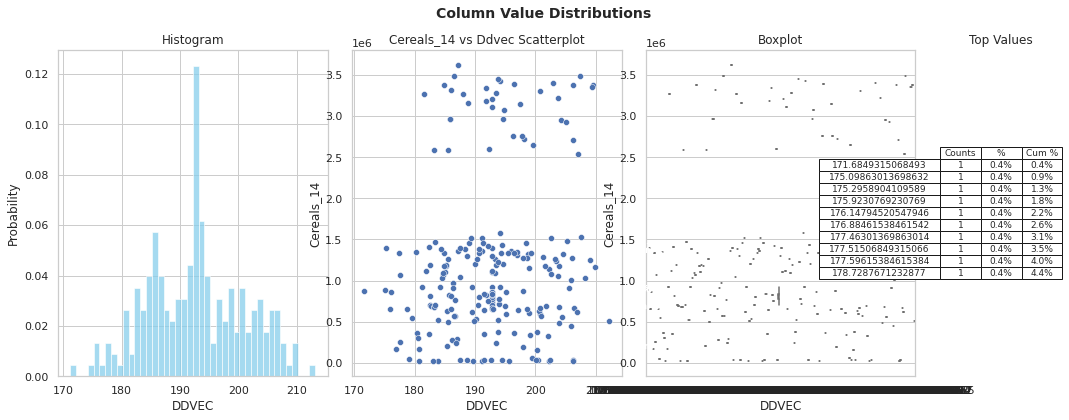

In [ ]:
# selecting each yield 
distplots(Farm_type_1, 'DDVEC', 'Cereals_14', 10)

In [ ]:
farm_1_ana = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'Cereals_14']]

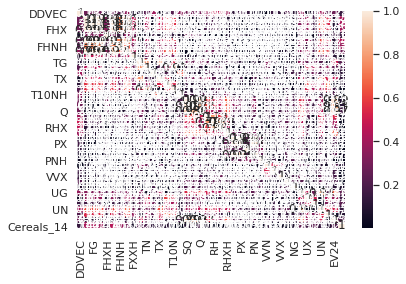

In [ ]:
sns.heatmap(farm_1_ana.corr().abs(), annot= True)

In [ ]:
corr = farm_1_ana.corr()

# correlation matrix for just price_log
corr['Cereals_14'].sort_values(ascending=False)

Cereals_14    1.00
FHN           0.45
FG            0.42
FHVEC         0.42
FHX           0.40
FHNH          0.38
FXX           0.29
UG            0.25
UX            0.17
FHXH          0.16
UN            0.15
DDVEC         0.14
TNH           0.12
VVN           0.12
DR            0.07
RHXH          0.06
VVNH          0.02
T10NH         0.01
VVXH          0.01
RHX           0.01
PXH           0.01
PNH          -0.01
T10N         -0.02
RH           -0.02
VVX          -0.03
PX           -0.04
PG           -0.04
PN           -0.05
FXXH         -0.07
NG           -0.09
SQ           -0.09
UNH          -0.10
SP           -0.10
TXH          -0.11
TX           -0.13
Q            -0.17
TN           -0.19
EV24         -0.21
TG           -0.23
UXH          -0.24
Name: Cereals_14, dtype: float64

In [ ]:
# check for collinearity among potential predictors by pairs
df = (
     corr
     .stack()
     .reset_index()
     .sort_values(0, ascending=False)
)
# zip the default name columns level_0 and level_1
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace=True)
# now drop level columns
df.drop(columns=['level_1', 'level_0'], inplace=True)
# rename correlation column rather than 0
df.columns = ['correlation']
# drop duplicates and keep only pair correlations above 0.65
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .65]

,correlation
pairs,
"(DDVEC, DDVEC)",1.00
"(FHVEC, FG)",1.00
"(FHX, FG)",1.00
"(FHX, FHVEC)",0.99
"(FHN, FG)",0.99
"(FHN, FHVEC)",0.99
"(PX, PG)",0.99
"(FHX, FHN)",0.99
"(PN, PG)",0.99


In [ ]:
def calc_sm_ols(model_nbr, X, y):
    """Runs and returns statsmodel Ordinary Least Squares (OLS) regression model.
       Takes in X predictors and y target, generates model, predictions and 
       performance stats.
    
        Parameters:
        model_nbr (int): sequence number you've created for model iteration
        X (pd.DataFrame): train or test slice contains predictors
        y (pd.DataFrame)): train or test slice contains target
        Returns:
        model (linear_model): statsmodel fitted OLS model object
        rsq_adj (float): model adjusted r-squared
        rmse (float): model root mean squared error
        mae (float): models mean absolute error
   """
    
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    # generate model predictions and calculate errors 
    y_pred = model.predict(X)
    if y.name == 'price' :
        rmse = round(ev.rmse(y, y_pred))
        mae = round(ev.meanabs(y, y_pred))
        print(f'\nModel {model_nbr} Summary Statistics')
        print(f'Root Mean Squared Error (RMSE): {rmse}.')
        print(f'Mean Absolute Error (MAE): {mae}.')
    elif y.name == 'price_log' :
        rmse = round(ev.rmse(np.exp(y), np.exp(y_pred)))
        mae = round(ev.meanabs(np.exp(y), np.exp(y_pred)))
        mae_log = ev.meanabs(y, y_pred)
        print(f'\nModel {model_nbr} Summary Statistics')
        print(f'Root Mean Squared Error (RMSE): {rmse}.')
        print(f'Mean Absolute Error (MAE): {mae} | Log y: {mae_log}')
    else :
        print(f'Cannot calculate RMSE and MAE from y variable {y}')
    rsq_adj = model.rsquared_adj                 
    return model, rsq_adj, rmse, mae

In [ ]:
mlflow.sklearn.autolog()

In [ ]:
reg = LinearRegression().fit(X, y) 

2021/09/12 18:44:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8938efdc83e54f0d8a42d9514c41b1ff', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/12 18:45:01 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/8938efdc83e54f0d8a42d9514c41b1ff/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
reg.score(X, y)

0.7845342637149324

In [ ]:
mlflow.sklearn.autolog()

In [ ]:
 mlflow.log_param("normalize", "True")

In [ ]:
reg = LinearRegression(normalize=True).fit(X,y)

2021/09/12 18:50:58 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/0fd0c008444f468484c39ccd3ace3ed2/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Cereals_14   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              52.09
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                    2.29e-81
Time:                        18:39:38   Log-Likelihood:                         -3275.6
No. Observations:                 227   AIC:                                      6629.
Df Residuals:                     188   BIC:                                      6763.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
mlflow.statsmodels.autolog()

2021/09/12 18:42:00 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of statsmodels. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a supported version, or try upgrading MLflow.


In [ ]:
display(IPython.display.IFrame(f"https://dagshub.com/{REPO_OWNER}/{REPO_NAME}/experiments/#/",'100%',600))

In [27]:
# fxn

def reg_print(model, y_test, y_pred, x_test):
  print('Coefficients: \n', model.coef_)
  print('rank :', model.rank_)
  # The mean squared error
  print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

  # Plot outputs

  x_test=np.arange(0,len(x_test),1)

  plt.scatter(x_test, y_test,  color='black')
  plt.plot(x_test, y_pred, color='blue', linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()

# Potatoes total


In [43]:
potatoes_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'PotatoesTotal_9']]

In [45]:
X_potatoes = potatoes_df[features]

y_potatoes = potatoes_df['PotatoesTotal_9']

In [46]:
X_train_potatoes, X_test_potatoes, y_train_potatoes, y_test_potatoes = train_test_split(
    X_potatoes, y_potatoes, test_size=0.2, random_state=42)

In [47]:
potatoes = LinearRegression(normalize=True).fit(X_train_potatoes, y_train_potatoes)

2021/09/17 12:44:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cc028b3b4a4949a1b59e336ae99d85a1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 12:44:47 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/cc028b3b4a4949a1b59e336ae99d85a1/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [49]:
potatoes_pred = potatoes.predict(X_test_potatoes)

Coefficients: 
 [ 3.83895007e+02  4.83639592e+04  1.30807483e+05 -5.56978249e+04
  3.51377627e+05 -6.16661971e+04  3.47381169e+04 -3.15400562e+04
  4.67210146e+04 -2.35283978e+04 -5.10239244e+04  2.73492602e+05
  5.30332493e+04 -7.39692328e+05  1.76907248e+04  1.10199130e+05
  4.29909320e+05 -3.64715595e+05 -1.04146800e+04  2.91450114e+04
 -9.96538770e+03  1.07954978e+04  9.06097338e+04  1.79155774e+05
 -9.01527319e+04 -6.01714761e+04 -9.50880828e+04 -4.49245257e+05
  5.60679897e+04  1.25400131e+05 -1.56382080e+05  1.23029339e+05
  1.32109556e+05  8.26789002e+04 -8.08916419e+04 -1.93727330e+05
 -8.12194164e+04 -1.18107025e+05 -2.78967014e+05]
rank : 39
Mean squared error: 326049933614.10
Coefficient of determination: 0.41


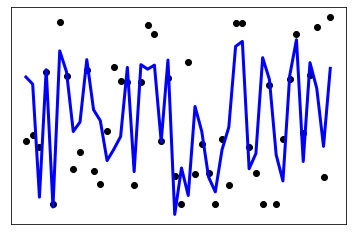

In [50]:
reg_print(potatoes, y_test_potatoes, potatoes_pred, X_test_potatoes)

In [105]:
filename = 'potatoes.sav'
pickle.dump(potatoes, open(filename, 'wb'))

# Vegetables Arable 

Arable vegetables include: kale, peas (harvested green), celeriac, beetroot, rutabaga, salsify, spinach, French beans, sweet corn, broad beans (harvested green), onions, winter carrots and Belgian endive (roots).

In [20]:
mlflow.sklearn.autolog()

In [16]:
veg_arable_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'VegetablesArable_13']]

In [17]:
X_veg_ara = veg_arable_df[features]

y_veg_ara = veg_arable_df['VegetablesArable_13']

In [21]:
X_train_veg_ara, X_test_veg_ara, y_train_veg_ara, y_test_veg_ara = train_test_split(
    X_veg_ara, y_veg_ara, test_size=0.2, random_state=42)

In [22]:
veg_ara = LinearRegression(normalize=True).fit(X_train_veg_ara, y_train_veg_ara)

2021/09/17 12:25:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '17f4e2ebf0f24dbcb9be6f985f1f94d2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 12:25:41 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/17f4e2ebf0f24dbcb9be6f985f1f94d2/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [24]:
veg_ara_pred = veg_ara.predict(X_test_veg_ara)

Coefficients: 
 [   3501.7270202   100673.3478647   128787.34041102   17291.82128921
  -29782.53464751 -200452.70058631  -29780.20576378  -90660.59107138
  -39010.86370284  112493.16222464  -54093.36693559   18746.63367769
  -62912.41674961 -130216.21448306   11948.0831852   -71308.9964857
   78104.19337591  -37330.73686191   -4299.29277103    9696.22971287
    7960.20142373  -14735.11021502  135605.8739829   135587.95494558
  -71441.61161322  -17435.34344226  -66036.23080051 -204384.30206914
   65865.88888977  177089.05645332  -75494.58497292  197217.69247847
  -11783.06474893   17597.85226617   15300.23767447 -122447.70706723
  -74991.45018586  272479.18130555  -39837.10822452]
rank : 39
Mean squared error: 128038397525.33
Coefficient of determination: 0.18


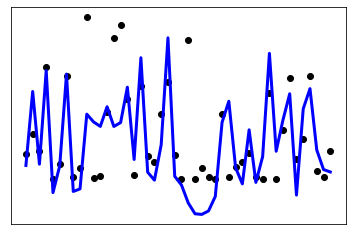

In [28]:
reg_print(veg_ara, y_test_veg_ara, veg_ara_pred, X_test_veg_ara)

In [106]:
filename = 'arable_vegetables.sav'
pickle.dump(veg_ara, open(filename, 'wb'))

# Cereals

Cereals harvested for grain, including seed.
_
Includes barley, sorghum, oats, maize (excluding green maize), rye, wheat and triticale.

In [30]:
cereal_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'Cereals_14']]

In [32]:
X_cereal = cereal_df[features]

y_cereal = cereal_df['Cereals_14']

In [33]:
X_train_cer, X_test_cer, y_train_cer, y_test_cer= train_test_split(
    X_cereal, y_cereal, test_size=0.2, random_state=42)

In [34]:
cereal = LinearRegression(normalize=True).fit(X_train_cer, y_train_cer)

2021/09/17 12:34:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '667a618104644313ac7997d3fa5757ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 12:34:25 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/667a618104644313ac7997d3fa5757ba/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [35]:
cereal_pred = cereal.predict(X_test_cer)

Coefficients: 
 [-1.51133925e+03  5.68476761e+03  5.38426388e+05 -2.68118578e+05
  3.25976722e+05 -1.13357666e+05  2.95220456e+04 -4.74217900e+04
  1.36952756e+05 -1.39374216e+05 -7.89016781e+04  4.07221587e+05
  1.55345150e+05 -7.93433466e+05  5.84696038e+04 -9.66769529e+04
  1.48317616e+05 -2.16239897e+05  1.94513850e+02  1.50306910e+04
 -6.86764265e+03  1.00095478e+05 -3.21894332e+04  2.49728136e+04
 -2.47815968e+04  1.92502944e+04 -7.38552293e+03  6.68338478e+04
  9.02045278e+04  3.61202819e+05 -3.60072226e+04 -7.21908994e+04
 -3.49323913e+05 -3.13409846e+04  4.93757958e+04 -1.06790523e+05
 -5.07325935e+04 -5.37966041e+05 -2.92575156e+05]
rank : 39
Mean squared error: 263531035064.84
Coefficient of determination: 0.81


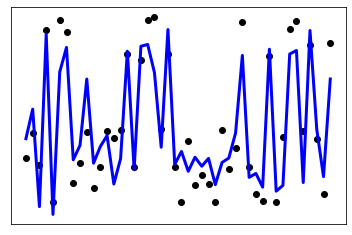

In [36]:
reg_print(cereal, y_test_cer, cereal_pred, X_test_cer)

In [38]:
filename = 'cereal_model.sav'
pickle.dump(cereal, open(filename, 'wb'))

# Industrial crops 
Crops that are normally not sold directly for consumption because they need to be industrially processed prior to final use.
_
Includes black poppy, industrial chicory, hemp, caraway seed, colza seed, rape seed, linseed, soy beans, flax and sunflowers.

In [51]:
industrial_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'IndustrialCrops_16']]

In [53]:
X_industrial = industrial_df[features]

y_industrial = industrial_df['IndustrialCrops_16']

In [54]:
X_train_ind, X_test_ind, y_train_ind, y_test_ind= train_test_split(
    X_industrial, y_industrial, test_size=0.2, random_state=42)

In [55]:
industrial = LinearRegression(normalize=True).fit(X_train_ind, y_train_ind)

2021/09/17 12:53:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ab5cdf8a44cc4ec28b2a719967fb8d2f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 12:53:13 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/ab5cdf8a44cc4ec28b2a719967fb8d2f/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [56]:
ind_pred = industrial.predict(X_test_ind)

Coefficients: 
 [  -133.16478324 -14136.18657897  57798.44612637 -15641.20393088
 -26471.57400863  -3479.02792825   9842.96982591 -10195.38250091
  37225.22177244  11546.57314601 -14779.29606421  17206.91867321
   2142.53793005 -65888.05934821   1656.18539056   1505.83106666
 -27848.00475708  16257.24495242    432.46414403   3083.3572959
  -5999.85459382  18023.15438893   1446.80577394  -1272.94489519
    149.0716629   -6045.70282913   1038.49349801  -8403.37479715
   4872.91520709  23899.01355571  -1712.60165515 -14245.93606372
  -8957.6110155    2726.01722079   3486.59182023  -3502.77792508
 -12626.2804402  -41397.66428941  13313.24117222]
rank : 39
Mean squared error: 2782701650.21
Coefficient of determination: 0.86


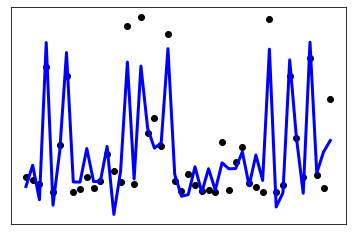

In [57]:
reg_print(industrial, y_test_ind, ind_pred, X_test_ind)

In [107]:
filename = 'industrial_crops_model.sav'
pickle.dump(industrial, open(filename, 'wb'))

# Pulses

Plants with edible seeds that grow in pulses.
_
Includes kidney beans, grey peas, sweet lupines, broad beans (harvested dry), field beans and field peas.

In [58]:
pulses_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'Pulses_17']]

In [59]:
X_pulses = pulses_df[features]

y_pulses = pulses_df['Pulses_17']

In [60]:
X_train_pulses, X_test_pulses, y_train_pulses, y_test_pulses= train_test_split(
    X_pulses, y_pulses, test_size=0.2, random_state=42)

In [61]:
pulses = LinearRegression(normalize=True).fit(X_train_pulses, y_train_pulses)

2021/09/17 13:01:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f9bc2ffd1a214c2eab75bb7bb44718dd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 13:01:35 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/f9bc2ffd1a214c2eab75bb7bb44718dd/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [62]:
pulse_pred = pulses.predict(X_test_pulses)

Coefficients: 
 [  -460.59667192 -24512.40128323  49619.06002404  -8479.47433674
   1643.84049097 -10101.91512573   4597.09807981  -5943.35557386
   5476.53392554   8651.30140838  -3920.00669746    740.95909895
  -2103.23182801   2791.16486391  -1139.36171699   4868.76625489
 -13044.40066712   8949.19447517    366.4470311   -2130.69545301
    187.1212506    2895.99521519   5849.6585102    7352.38906899
  -3164.4501648  -18752.42262529  -4600.7519177  -12425.52359109
    725.06360754   7891.49957418  -4400.96085216  -9574.62962848
  -5228.38527446  -4817.67834754   3404.00576328  -2205.36376246
  -2764.61035522 -26496.25818459  -9688.22143551]
rank : 39
Mean squared error: 823433848.21
Coefficient of determination: 0.75


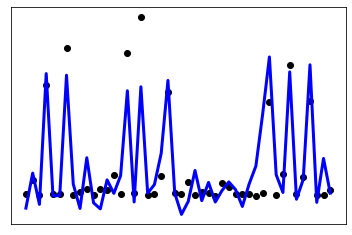

In [63]:
reg_print(pulses, y_test_pulses, pulse_pred , X_test_pulses)

In [108]:
filename = 'pulses_model.sav'
pickle.dump(pulses, open(filename, 'wb'))

# Sugar beets

In [109]:
sugar_beets_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'SugarBeets_18']]

In [ ]:
sugar_beets_df.fillna(sugar_beets_df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [110]:
X_sug = sugar_beets_df[features]

y_sug = sugar_beets_df['SugarBeets_18']

In [111]:
X_train_sug, X_test_sug, y_train_sug, y_test_sug = train_test_split(
    X_sug, y_sug, test_size=0.2, random_state=42)

In [ ]:
mlflow.sklearn.autolog()

In [112]:

reg_sug = LinearRegression(normalize=True).fit(X_train_sug, y_train_sug)

2021/09/17 15:35:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e37488263dcf460389927155086d6258', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 15:35:55 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/e37488263dcf460389927155086d6258/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [113]:
sugar_beets_pred = reg_sug.predict(X_test_sug)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [   -961.97532864  -23237.97880329  184451.29359026  -53177.39198322
  119332.9953638   -67450.51728282    2475.37003468  -32664.00310046
   15004.89093367  -17981.01506902  -31443.62801669  100339.74442634
   34592.07004524 -328078.19233849   14564.35747239   36594.05746922
   77213.3658627   -68895.86282039   -3852.52622541    3188.35799585
   12181.78972283   -1722.80389732   64697.41393559   94077.51559246
  -40169.80999473  -45000.64362156  -58049.84348543 -203963.36298081
   26054.74658084   76626.62618962  -78862.32660957   59232.23992288
    7680.21277235   33981.04472264  -73810.00321431  -87466.93308675
  -38039.67524811  -63179.3176275     4673.04002523]
rank : 39
Mean squared error: 93807124337.00
Coefficient of determination: 0.42


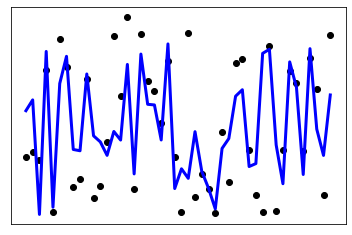

In [114]:
print('Coefficients: \n', reg_sug.coef_)
print('rank :', reg_sug.rank_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_sug, sugar_beets_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_sug, sugar_beets_pred))

# Plot outputs

X_test_sug=np.arange(0,len(X_test_sug),1)

plt.scatter(X_test_sug, y_test_sug,  color='black')
plt.plot(X_test_sug, sugar_beets_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [115]:
filename = 'sugar_beets_model.sav'
pickle.dump(reg_sug, open(filename, 'wb'))

In [ ]:
# removed hourly data

features_edited_hourly = ['DDVEC', 'FHVEC', 'FG', 'FHX',  'FHN', 'FXX', 'TG', 'TN', 'TX',  'T10N',  'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'PG', 'PX', 'PN', 'VVN' , 'VVX',  'NG', 'UG', 'UX', 'UN',  'EV24']

In [ ]:
X_sug_ed = sugar_beets_df[features_edited_hourly]

y_sug_ed = sugar_beets_df['SugarBeets_18']

In [ ]:
X_train_sug, X_test_sug, y_train_sug, y_test_sug = train_test_split(
    X_sug_ed, y_sug_ed, test_size=0.2, random_state=42)

In [ ]:
mlflow.sklearn.autolog()

In [ ]:
reg_sug = LinearRegression(normalize=True).fit(X_train_sug, y_train_sug)

2021/09/16 17:30:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '531fb184e65f4379a0e959c6ea49f5d8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/16 17:30:58 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/531fb184e65f4379a0e959c6ea49f5d8/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
sugar_beets_pred = reg_sug.predict(X_test_sug)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [-1.33071444e+02 -8.75076252e+03  1.31762267e+05 -3.66163301e+04
 -4.56498803e+04 -2.82109021e+04 -6.63596431e+03 -3.66396138e+04
  3.45473662e+04  1.37971834e+04  1.64281970e+05 -1.43291237e+05
 -4.98535479e+02  5.42136286e+03  1.93894389e+04 -1.53459668e+04
  1.27925474e+05 -5.70674681e+04 -7.76427077e+04  2.01032645e+04
 -9.53779390e+04  1.30347851e+05 -8.13050346e+03 -6.97562823e+04
  7.93951062e+03 -3.04953015e+05]
Mean squared error: 134024040821.86
Coefficient of determination: 0.17


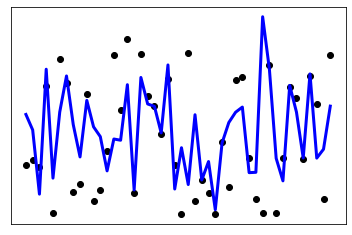

In [ ]:
print('Coefficients: \n', reg_sug.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_sug, sugar_beets_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_sug, sugar_beets_pred))

# Plot outputs

X_test_sug=np.arange(0,len(X_test_sug),1)

plt.scatter(X_test_sug, y_test_sug,  color='black')
plt.plot(X_test_sug, sugar_beets_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Ridge regression full

clf_sug = Ridge(alpha=1.0)

In [ ]:
clf_sug.fit(X_train_sug , y_train_sug)

2021/09/16 17:47:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '94dbfd7f3e6540458f771689a13bfad4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/16 17:47:37 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/94dbfd7f3e6540458f771689a13bfad4/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
X_test_sug = X_test_sug.reshape(1,-1) 

In [ ]:
predicted_clf_sug = clf_sug.predict(X_test_sug)

Mean squared error: 96975068541.59
Coefficient of determination: 0.40


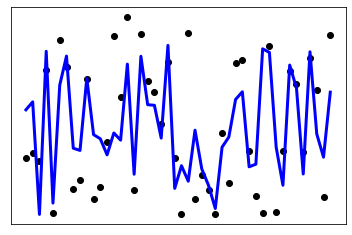

In [ ]:
# print('Coefficients: \n', reg_sug.coef_)
# # The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_sug, predicted_clf_sug ))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_sug,  predicted_clf_sug))

# Plot outputs

X_test_sug=np.arange(0,len(X_test_sug),1)

plt.scatter(X_test_sug, y_test_sug,  color='black')
plt.plot(X_test_sug,  predicted_clf_sug, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_sug, y_train_sug, X_test_sug)

In [ ]:
from matplotlib import pyplot

Feature 0: 0.217474
Feature 1: 10.852226
Feature 2: 11.075576
Feature 3: 10.005101
Feature 4: 4.580108
Feature 5: 12.323992
Feature 6: 8.141282
Feature 7: 3.543571
Feature 8: 0.001794
Feature 9: 9.150790
Feature 10: 10.026295
Feature 11: 0.967016
Feature 12: 1.798512
Feature 13: 3.566641
Feature 14: 2.168489
Feature 15: 2.293440
Feature 16: 1.161228
Feature 17: 1.611757
Feature 18: 5.299509
Feature 19: 1.136561
Feature 20: 0.394243
Feature 21: 0.017124
Feature 22: 2.042084
Feature 23: 2.556781
Feature 24: 2.012329
Feature 25: 0.057567
Feature 26: 3.256821
Feature 27: 3.556985
Feature 28: 0.039621
Feature 29: 0.677372
Feature 30: 12.594169
Feature 31: 0.148348
Feature 32: 0.005178
Feature 33: 6.559989
Feature 34: 1.239279
Feature 35: 13.247466
Feature 36: 2.616226
Feature 37: 0.431051
Feature 38: 6.794976


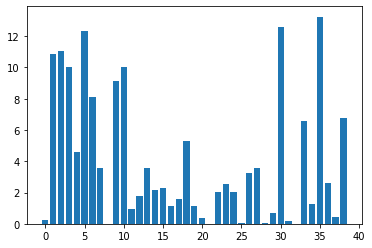

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
LIMITED = LinearRegression(normalize=True).fit(X_train_fs, y_train_sug)

2021/09/16 18:00:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '62b546e7a04a4a648486b6f94305b202', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/16 18:00:11 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/62b546e7a04a4a648486b6f94305b202/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
yhat = LIMITED.predict(X_test_fs)

Mean squared error: 93807124337.01
Coefficient of determination: 0.42


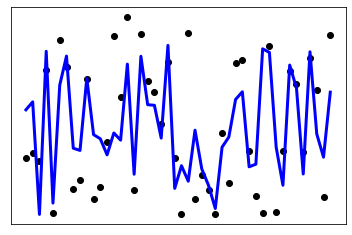

In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_sug, yhat ))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_sug,  yhat))

# Plot outputs

X_test_sug=np.arange(0,len(X_test_sug),1)

plt.scatter(X_test_sug, y_test_sug,  color='black')
plt.plot(X_test_sug,  predicted_clf_sug, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Other arable crops
Includes miscanthus and sod.

In [64]:


other_ara_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'OtherArableCrops_19']]

In [66]:
X_other_ara = other_ara_df[features]

y_other_ara = other_ara_df['OtherArableCrops_19']

In [67]:
X_train_other_ara, X_test_other_ara, y_train_other_ara, y_test_other_ara= train_test_split(
    X_other_ara, y_other_ara, test_size=0.2, random_state=42)

In [78]:
other_ara = LinearRegression(normalize=True).fit(X_train_other_ara, y_train_other_ara)

2021/09/17 14:35:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6895d04522e54a78a7bbd78ad3828718', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 14:35:36 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/6895d04522e54a78a7bbd78ad3828718/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [79]:
other_ara_pred = other_ara.predict(X_test_other_ara)

Coefficients: 
 [-5.42023355e+00  6.93001022e+03 -7.41733186e+03  4.10078278e+03
 -2.38259881e+04  1.23516439e+02 -2.17669181e+03 -2.91251625e+03
  1.35001699e+04  3.39100032e+03 -3.58051789e+03 -9.16274490e+02
 -1.65773046e+03  7.01050024e+02  1.05540432e+03  3.47176372e+02
  1.98010508e+03 -7.50992177e+02 -6.04268123e+02  1.86926227e+03
  3.80733851e+02  8.57678014e+02  3.12083843e+03  4.29949092e+03
 -9.01830433e+02  1.14027623e+04 -3.59997688e+03  8.71988009e+01
  1.58866103e+03  5.27876565e+03 -4.86651355e+03  6.47156700e+03
  7.53741943e+02  1.12017349e+04 -8.76415516e+03  5.85445374e+02
 -8.25618602e+03  1.03746185e+04  2.80105741e+04]
rank : 39
Mean squared error: 631555033.76
Coefficient of determination: 0.03


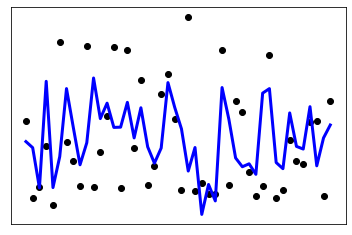

In [80]:
reg_print(other_ara, y_test_other_ara, other_ara_pred  , X_test_other_ara)

In [116]:
filename = 'other_arable_crops_model.sav'
pickle.dump(other_ara, open(filename, 'wb'))

# Fruits in the open

Includes soft fruits (e.g. blueberries, raspberries), stone fruits (e.g. apples, pears, prunes), nuts and grapes. Standard tree orchards have been added since 2016 onwards.


In [81]:
fruit_open_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'FruitInTheOpen_38']]

In [82]:
X_fruit = fruit_open_df[features]

y_fruit = fruit_open_df['FruitInTheOpen_38']

In [83]:
X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit= train_test_split(
    X_fruit, y_fruit, test_size=0.2, random_state=42)

In [84]:
fruit = LinearRegression(normalize=True).fit(X_train_fruit,y_train_fruit)

2021/09/17 14:39:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eb324eaa87cb4852bc067300ac5298b8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 14:39:36 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/eb324eaa87cb4852bc067300ac5298b8/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [86]:
fruit_pred = fruit.predict(X_test_fruit)

Coefficients: 
 [   49.81042074  -734.63303937  1376.68502884   118.10364058
  -589.91437504   314.8716048    999.94038685  -744.40670885
   103.11317129   889.86677981  -455.98502683 -1085.12854601
  -309.17776938   705.09372794   -79.6022846    992.46529315
  -887.7386962    660.98352526     6.77177108    40.04684567
   129.00799285   -34.11546667   229.34302974   980.4959078
  -564.24209106  -668.14731966  -445.52546563 -1418.59940185
   256.87663445  1684.14485023  -276.51125507  -194.44067194
  -989.38744353  -933.93320791   515.70596506  -225.56275178
   -84.01315957 -1043.10765605    40.84371573]
rank : 39
Mean squared error: 6235110.78
Coefficient of determination: 0.81


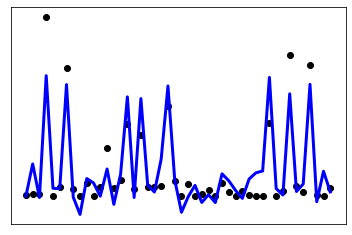

In [89]:
reg_print(fruit, y_test_fruit, fruit_pred, X_test_fruit)

In [117]:
filename = 'fruits_model.sav'
pickle.dump(fruit, open(filename, 'wb'))

# Mushrooms

In [90]:
mushrooms_df = Farm_type_1[['DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24', 'MushroomsTotal_68']]

In [95]:
X_mushroom = mushrooms_df[features]

y_mushroom = mushrooms_df['MushroomsTotal_68']

In [96]:
X_train_mushroom, X_test_mushroom, y_train_mushroom, y_test_mushroom= train_test_split(
    X_mushroom, y_mushroom, test_size=0.2, random_state=42)

In [97]:
mushroom = LinearRegression(normalize=True).fit(X_train_mushroom,y_train_mushroom)

2021/09/17 14:51:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd870a19da8134361b5980d5748fadc84', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/09/17 14:51:14 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/282/d870a19da8134361b5980d5748fadc84/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [99]:
mushroom_pred = mushroom.predict(X_test_mushroom)

Coefficients: 
 [ 0.00077546 -0.02332433  0.01679403 -0.00353932 -0.03259138  0.01022636
 -0.00175865  0.00073354  0.02421685  0.01735105 -0.00721977 -0.01055025
 -0.01114747  0.01691534 -0.00043486  0.04383181 -0.00339439  0.00207284
 -0.00145877  0.00744974 -0.00452806  0.00442388 -0.02381218  0.08751797
 -0.04509066 -0.05112908 -0.04141413 -0.02260893 -0.00030897 -0.03422978
 -0.00477474  0.00657778 -0.06634215  0.02484797 -0.01691021  0.00054795
 -0.00830582  0.02880348  0.0840328 ]
rank : 39
Mean squared error: 0.02
Coefficient of determination: -0.06


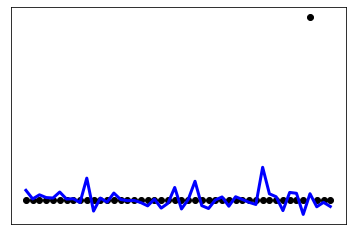

In [101]:
reg_print(mushroom, y_test_mushroom, mushroom_pred, X_test_mushroom)

In [118]:
# No longer using mushrooms. most data is 0